### Naive Bayes

#### Bayes Theorem

* Suppose we have two different machines (m1 & m2) making candy and dumping the candy into a pile
* Let's say m1 makes red candy, m2 makes green candy
* Suppose that every now and then though, the candy that the machines make turns out defective (tastes bad)
* So what we would like to know is the probability of finding a defective candy
    *  More specifically, we want to know what is the probability of m2 producing a defective candy
* To get that prob, we will use Bayes Theorem:
$$
\begin{equation}
\mathbf{P(A\,|\,B) = \frac{P(B\,|\,A) \cdot P(A)}{P(B)}} \\
P(A) \; = \; Prior \; Probability \\
P(B) \; = \; Marginal \; Likelihood \\
P(B\,|\,A) \; = \; Likelihood \\
P(A\,|\,B) \; = \; Posterior \; Probability \\
\end{equation}
$$
---
* Prior info:
    *  m1 makes 30 candies/hr
    *  m2 makes 20 candies/hr
    *  out of all candies: 1% defective
    *  out of all defective candies: 50% came from m2 (thus 50% from m1)
* Question: What is the probability that a candy produced by m2 is defective?
* For 1st hr of production:
    *  P(m1) = 30/50 = 0.6
    *  P(m2) = 20/50 = 0.4
    *  P(defect) = 1% = 0.01
    *  P(m1|defect) = 50% = 0.5
    *  P(m2|defect) = 50% = 0.5
    *  Question: P(defect|m2)?
$$
\begin{equation}
P(defect\,|\, m2) = \frac{P(m2\,|\,defect) \cdot P(defect)}{P(m2)} \\
P(defect\,|\, m2) = \frac{0.5 \cdot 0.01}{0.4} = 0.0125
\end{equation}
$$

#### Naive Bayes

* Suppose we have two IVs for people (salary, age)
* And we have two categories for those people (they either walk, or drive to work)
* Suppose we got a new input for a person (their age & salary), how do we classify that person as someone who either walks or drives to work?
* We can use Bayes theorem and apply it twice!
$$
\begin{equation}
P(walks\,|\, X) = \frac{P(X\,|\,walks) \cdot P(walks)}{P(X)} \\
P(drives\,|\, X) = \frac{P(X\,|\,drives) \cdot P(drives)}{P(X)} \\
X \; = \; features\;of\;that\;data\;point
\end{equation}
$$
* Then we will compare:
$$
\begin{equation}
P(walks\,|\, X)\;vs.\; P(drives\,|\, X)
\end{equation}
$$
---
* Getting P(walks|X):
$$
\begin{equation}
P(walks)\;=\; \frac{number\;of\;walkers}{total\;observations} \\
P(X) \;=\; \frac{number\;of\;similar\;observations}{total\;observations} \\
P(X\,|\,walks) \;=\; \frac{number\;of\;similar\;observations\;among\;those\;who\;walk}{total\;number\;of\;walkers} \\
\end{equation}
$$
* Apply similar methods for getting P(drives|X)
* If P(walks|X) > P(drives|X) classify as walks, otherwise vice versa

#### For visual purposes, method of getting P(X)

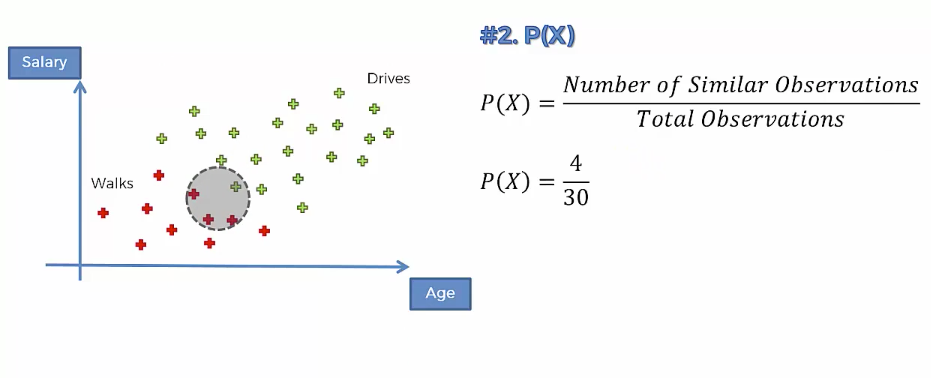

In [4]:
from IPython.display import Image, display
display(Image(filename='px.png', width=600, height=500, embed=True))

<div style="text-align: right"> &copy; SuperDataScience </div>

* You get to choose how big of a radius you want for the circle which encompasses the similar observations
* Also often times since P(X) is the same when calculating the two posterior probabilities, and you are comparing them in the end, you can drop P(X) (since both denominators are equal)

#### Implementation

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
print("dataset columns: " + str(dataset.columns.tolist()))
X = dataset.iloc[:, [2, 3]].values
print("X shape: " + str(X.shape))
y = dataset.iloc[:, 4].values
print("y shape: " + str(y.shape))

dataset columns: ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
X shape: (400, 2)
y shape: (400,)


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))

X_train shape: (300, 2)
X_test shape: (100, 2)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Fitting Naive Bayes classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [11]:
# Predicting the Naive Bayes Test set results
y_pred = classifier.predict(X_test)

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]])

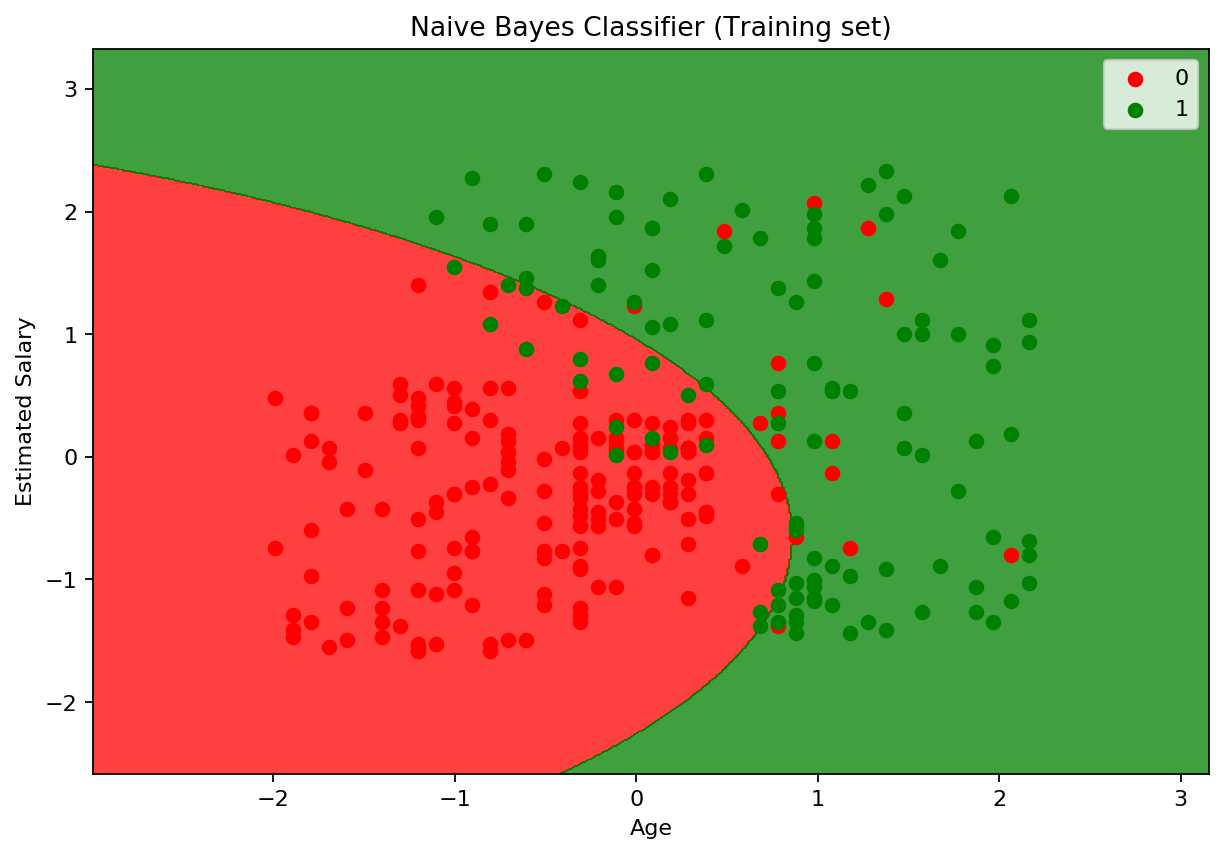

In [14]:
# Visualising the Naive Bayes Training set results
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig=plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

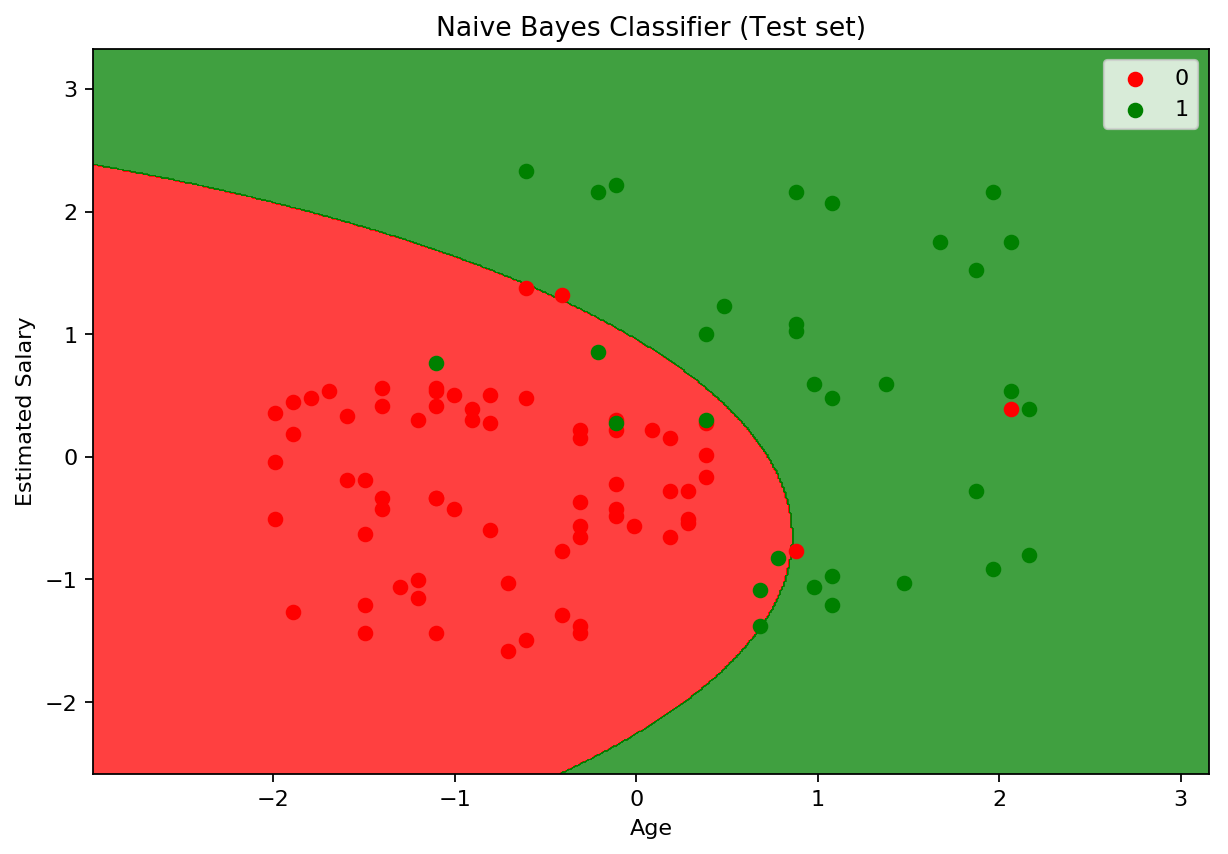

In [15]:
# Visualising the Naive Bayes Test set results
fig=plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Woo! Looks great!